# Lead Scoring Case Study

### Step 1: Importing and Reading the Dataset

#### Step 1.1 : Importing the necessary libraries

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#### Step 1.2 : Reading the Dataset

In [2]:
# read the dataste
leads_df = pd.read_csv("Leads.csv")

#viewing the first 5 rows of the dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#viewing the shape (no of rows and columns) of the dataframe
leads_df.shape

(9240, 37)

> <b>There are 9240 entries (rows) and 37 columns in the dataset

#### Step 1.3 : Understanding the Dataset

In [4]:
#checking the datatypes of each column
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
#view the info of the dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#unique entries in each column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
#check the statistical overview of the dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


> <b>There are OUTLIERS in multiple columns that must be handled while cleaning the data

In [8]:
#Checking the percentage of null values in each column
(100*(leads_df.isnull().sum())/len(leads_df)).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

> <b>There are large number of null values in multiple columns that need to be cleaned

In [15]:
# Check for duplicate rows
print(leads_df.duplicated().sum())

0


> <b>There are no Duplicates in the dataframe.

### Step 2: Data Preprocessing

#### Step 2.1 : Cleaning the Dataset

The problem statement mentions that there are Many categorical variables that have a level called 'Select' which needs to be handled because it is as good as a null value (presumable because it is the default response in the case where no response is selected)

In [9]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

In [10]:
# Percentage of null values
(100*(leads_df.isnull().sum())/len(leads_df)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

> <b>Percentage of missing values is as high as `~80%` in some columns

In [11]:
# Verifying if all "Select" values have been converted to NaN values
print([col for col in leads_df.columns if len(leads_df[col].isin(['Select']).unique())>1])

[]


> <b>All the `Select` values have been converted to `NaN` values which need to undergo Null Value Treatment

#### Step 2.2 : Missing Value Treatment

In [16]:
# create a function to drop columns with missing values

def drop_null_cols(data, percentage):
    null_val_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    cols_to_drop = null_val_perc[null_val_perc>=percentage].index.to_list()
    print("Columns dropped : " , cols_to_drop,"\n")

    leads_df.drop(labels=cols_to_drop, axis=1, inplace=True)
    
    print("Shape after dropping the columns: ",data.shape)

In [17]:
# Dropping the columns with percentage of missing values > 40%
drop_null_cols(leads_df, 40)

Columns dropped :  [] 

Shape after dropping the columns:  (9240, 30)


In [18]:
# Percentage of null values
(100*(leads_df.isnull().sum())/len(leads_df)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

> <b>There are 10 columns with null values remaining in dataset.

#### Step 2.3 : Columns with Categorical Data

In [19]:
# Select the columns with non-numeric data type
categorical_cols = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [20]:
# Approach would be to check the count of values in each categorical column and then decide how to treat the missing values for that particular column

columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

In [21]:
# Percentage of null values
(100*(leads_df.isnull().sum())/len(leads_df)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Insights: 

1. <b>City</b>: With 39.71% missing values, imputing with `Mumbai` would skew the data, causing bias in the model. Therefore, it is best to drop the `City' column.

2. <b>Specialization</b>: This variable has 36.58% missing values. Since the existing specializations are evenly distributed, neither imputation nor dropping the column is ideal. Instead, create an additional category called `Others` to handle the missing values.

3. <b>Tags</b>: Tags, indicating the current status of the lead, have 36.29% missing values. As they are not useful for predictive modeling, this column can be dropped.

4. <b>What matters most to you in choosing a course</b>: This variable has 29.32% missing values, with 99.95% of customers selecting `better career prospects.` This skewed distribution provides no significant insight, rendering the variable unhelpful.

5. <b>What is your current occupation</b>: Impute missing values with `Unemployed`, the most common category. This variable is important because X Education targets individuals seeking employment improvement through online courses.

6. <b>Country</b>: Since approximately 96% of customers are from India, it does not make sense to impute missing values with `India`. Therefore, the `Country` column can be dropped.

7. <b>Last Activity</b>: With only 1.11% missing values and `Email Opened` being the most frequent activity, impute missing values with `Email Opened`.

8. <b>Lead Source</b>: With `Google` as the most common source and only 0.39% missing values, impute missing values with `Google`.


> <b>Dropping the following columns:
<ul>
    <li>'City'</li>
    <li>'Tags'</li>
    <li>'Country'</li>
    <li>'What matters most to you in choosing a course'</li>
</ul>

In [22]:
# Dropping Columns
print("Before Drop",leads_df.shape)
leads_df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",leads_df.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


> <b>Imputing the following columns:
<ul>
    <li>'Specialization'</li>
    <li>'Lead Source'</li>
    <li>'Last Activity'</li>
    <li>'What is your current occupation'</li>
</ul>

In [23]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leads_df=leads_df.fillna(value=missing_values)

In [25]:
# Re Checking the percentage of null values for remaining columns

round(((leads_df.isnull().sum()/leads_df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### Step 2.4 : Columns with Numerical Data

In [27]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
leads_df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [28]:
# TotalVisits missing values to be imputed with mode
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mode()[0], inplace=True)

In [30]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
leads_df.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [31]:
# Page Views Per Visit missing values to be imputed with mode

leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0], inplace=True)

In [33]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((leads_df.isnull().sum()/leads_df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

#### Step 2.5 : Removing Unwanted Columns

In [34]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*leads_df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

><b> Dropping columns of no use for modeling</b>

Columns such as:
<ul>
<li>'Prospect ID'</li>
<li>'Lead Number'</li>
<li>'Last Notable Activity'</li>
</ul>
Above columns do not add any value to the model. <b>Dropping</b> these columns will remove unnecessary data from the dataframe.

In [38]:
# Dropping Columns
print("Before Dropping Columns",leads_df.shape)
leads_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",leads_df.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


#### Step 2.5.1 : Handling Columns with only one unique value

In [36]:
#check for columns with one unique value, count and freq is same

leads_df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,...,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


> Following columns have only one unique value:
<ul>
<li>'I agree to pay the amount through cheque'</li>
<li>'Get updates on DM Content'</li>
<li>'Update me on Supply Chain Content'</li>
<li>'Receive More Updates About Our Courses'</li>
<li>'Magazine'</li>
</ul>
These columns are of no use as they have only one category of response from customer and can be <b>dropped</b>.

In [37]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",leads_df.shape)
leads_df.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",leads_df.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


In [39]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(leads_df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

> No missing values

#### Step 2.6 : Checking & Dropping Category Columns that are Skewed

#### Step 2.6.1 : Checking skewness in categorical columns

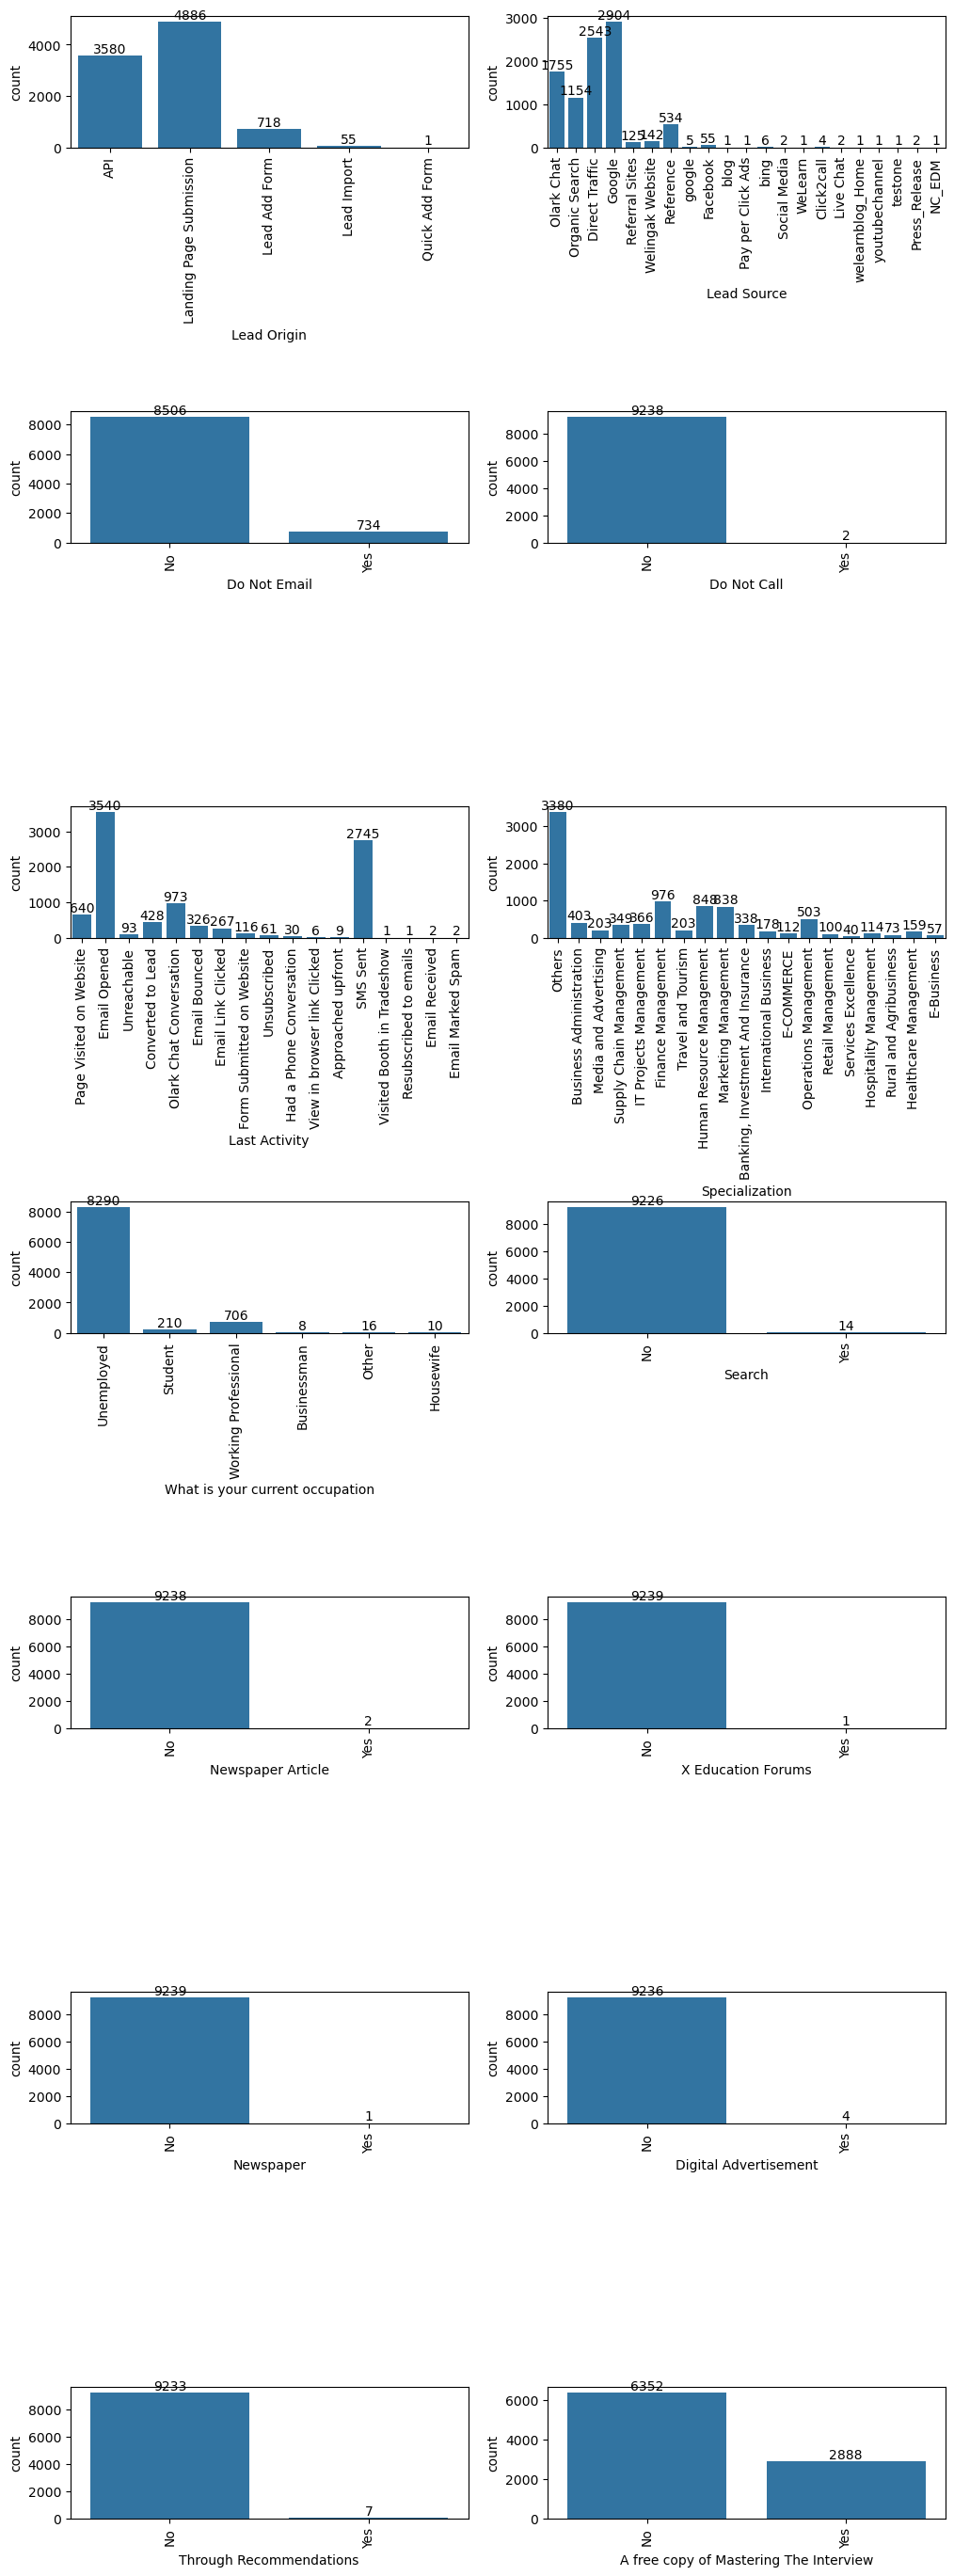

In [41]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leads_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

> Following columns have data which is `highly skewed` :
<ul>
<li>'Do Not Call'</li>
<li>'Search'</li>
<li>'Newspaper Article'</li>
<li>'X Education Forums'</li>
<li>'Newspaper'</li>
<li>'Digital Advertisement'</li>
<li>'Through Recommendations'</li>
</ul>

> Hence these columns will be <b>dropped</b> as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can <b>lead to biased or inaccurate parameter estimates.</b>

In [42]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",leads_df.shape)
leads_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",leads_df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [43]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### Step 2.7: Outlier Analysis

#### For Numerical Columns

In [44]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = leads_df[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

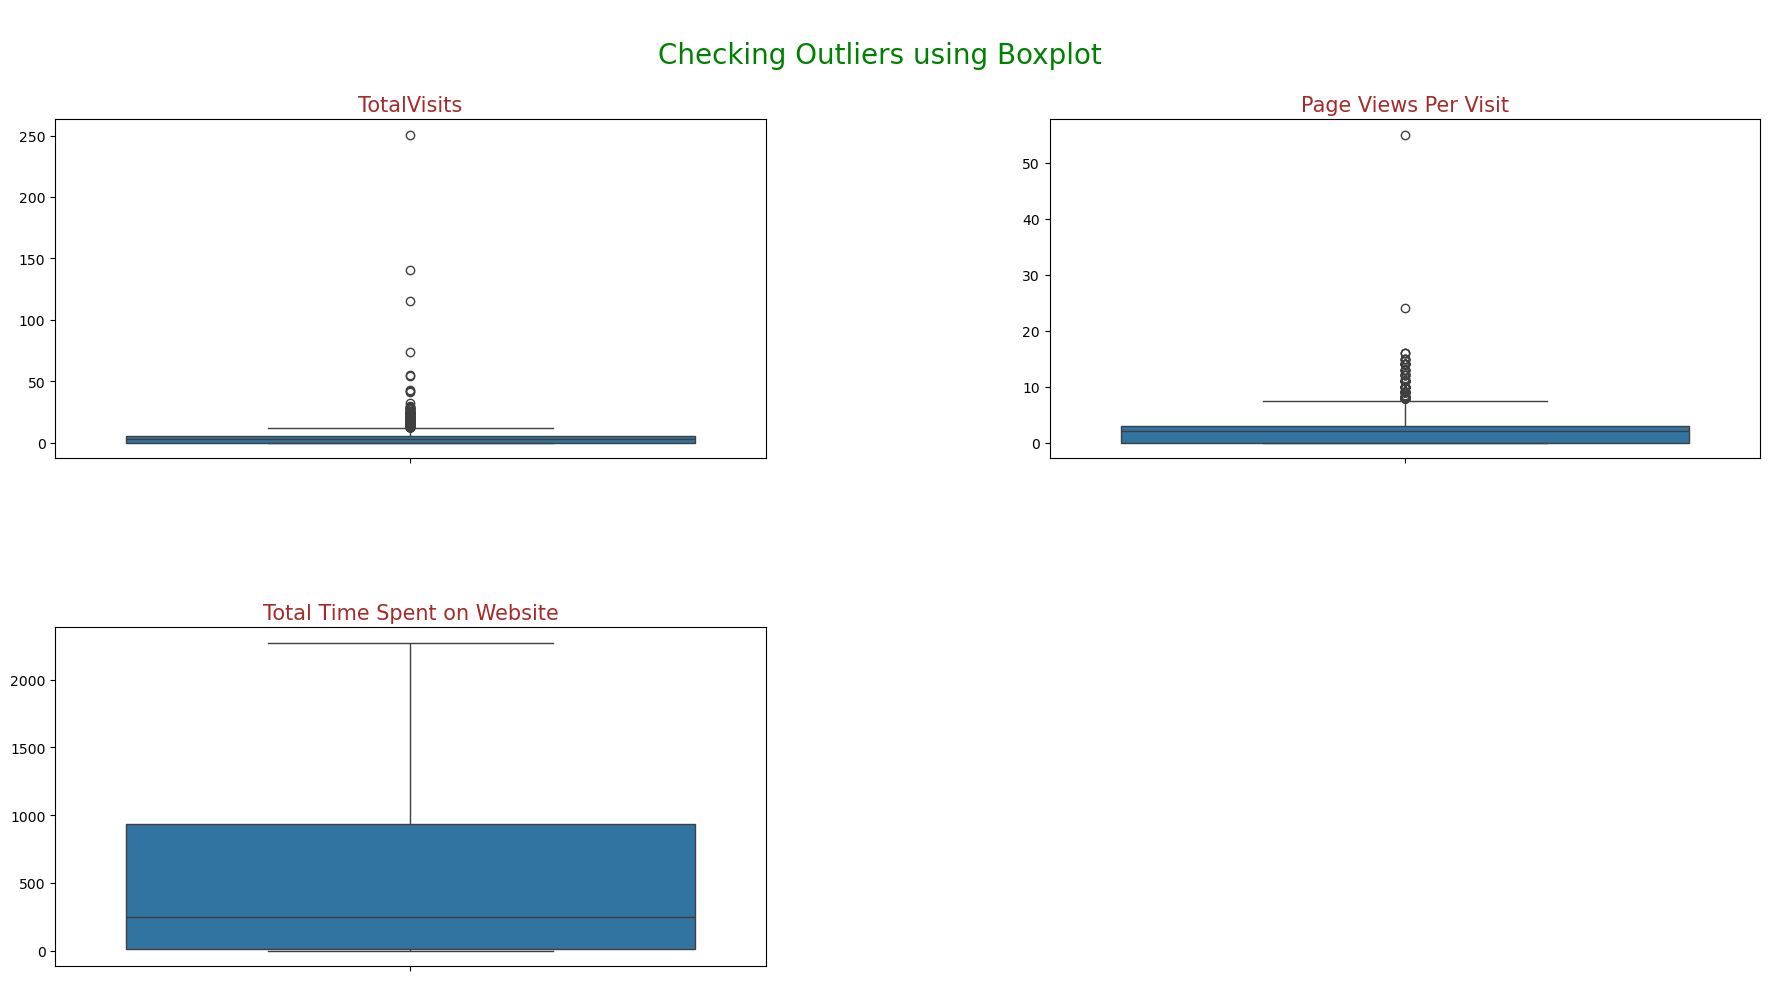

In [45]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(leads_df,num_cols)

`"TotalVisits"`, `"Page Views Per Visit"` :Both these variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

#### Capping Outliers for the treatment

In [46]:
# before outlier treatment
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [47]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [48]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(leads_df,capping_cols)

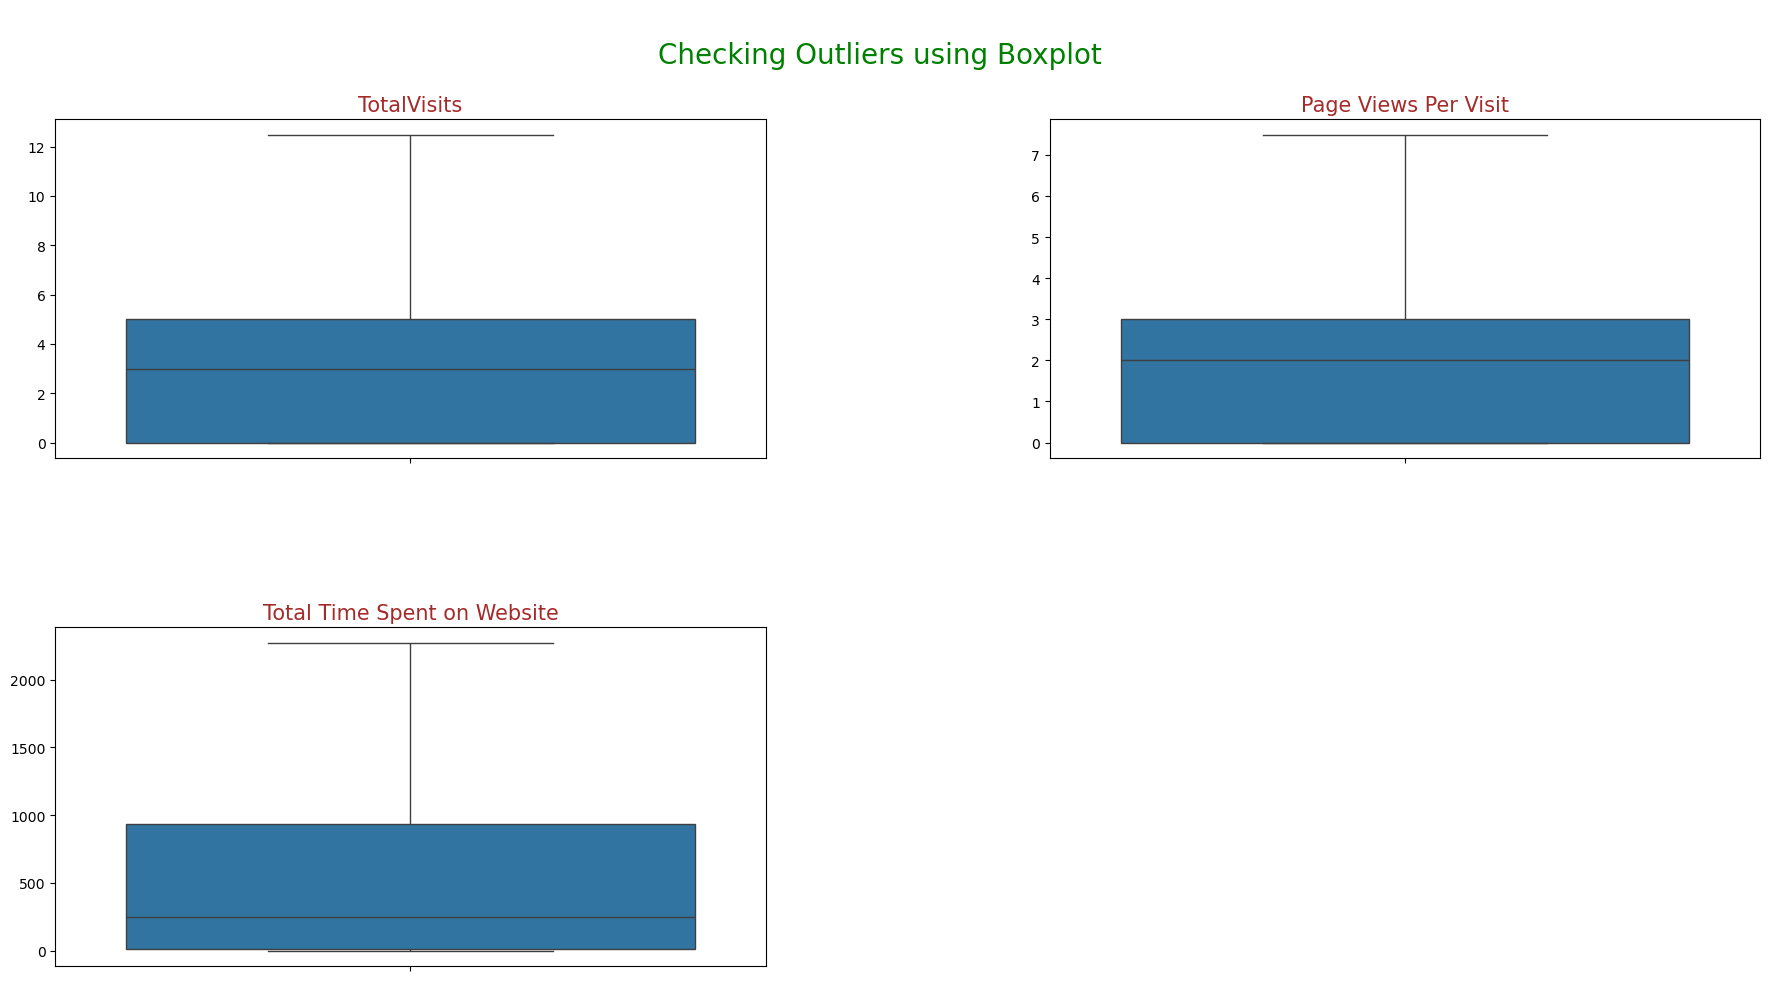

In [49]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(leads_df,num_cols)

In [50]:
# after outlier treatment detailed percentile values
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


#### Step 2.8: Fixing Invalid values & Standardising Data in columns

<ul>
    <li>Checking if entries in data are in correct format or not , casing styles (UPPER,lower)</li>
    <li>Checking data types of columns</li>
</ul>s

In [52]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [53]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLea

>We've noticed that some categories/levels in the `"Lead Source"` and `"Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under `"Others"`. That way, we can keep things neat and tidy.

>Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we will standardise the case.

#### Step 2.8.1: Grouping Low frequency values

In [54]:
# Grouping low frequency value levels to Others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace("google","Google")

In [55]:
# value_counts percentage after replace
leads_df["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [56]:
# Grouping low frequency value levels to Others 
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [57]:
# value_counts percentage after replace
leads_df['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [58]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
leads_df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
leads_df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

#### Step 2.8.2: Mapping Binary categorical variables

In [59]:
# "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0
# Mapping binary categorical variables (Yes/No to 1/0) 

leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_df['Free_copy'] = leads_df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [60]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


>  The data types appear to be suitable and no modifications are necessary.

### Step 3: Data Analysis (EDA)

#### 3.1 Checking if Data is Imbalanced or not

1. Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
2. Data imbalance is in the context of Target variable only
3. Target variable is 'Converted' which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

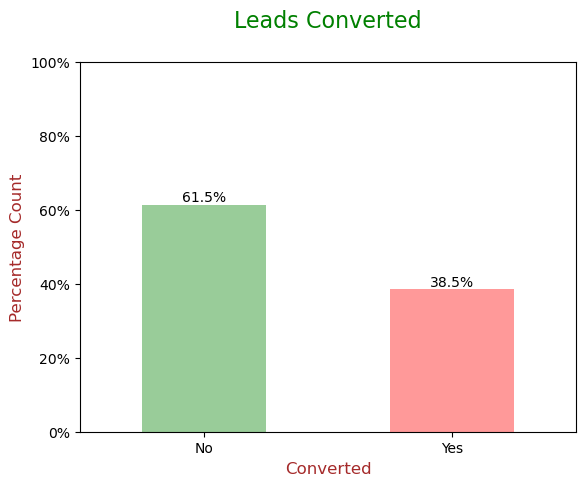

In [61]:
## ploting the results on bar plot

ax=(100*leads_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

> Insights:

<ul>
<li>Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)</li>
<li>While 61.5% of the people didnt convert to leads. (Majority)</li>
</ul>

In [62]:
### Ratio of Data Imbalance
ratio=(leads_df["Converted"].value_counts(normalize=True).loc[0])/(leads_df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


#### 3.2 Univariate Analysis

In [63]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


#### For Categorical Variables

In [64]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

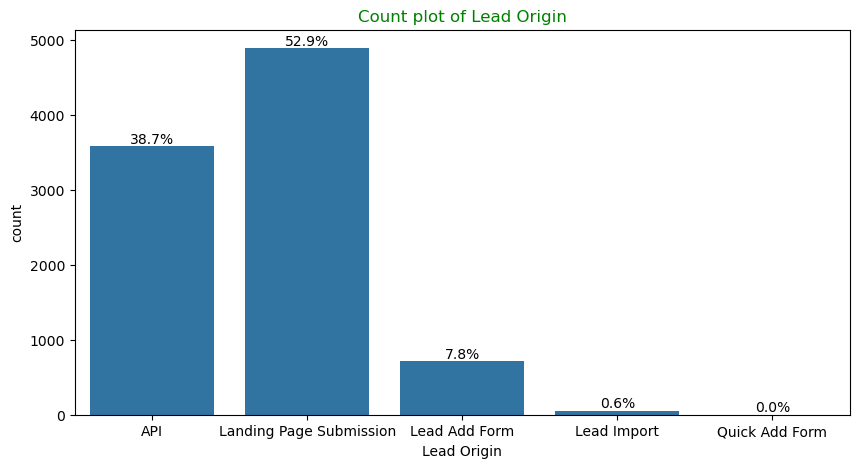

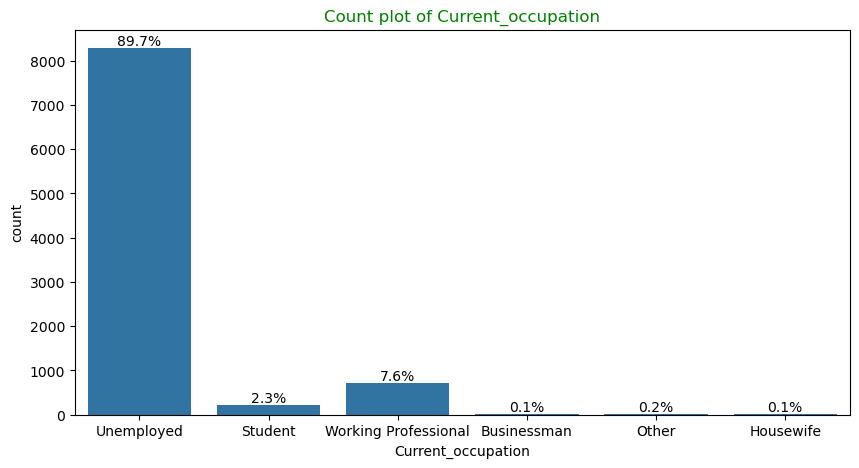

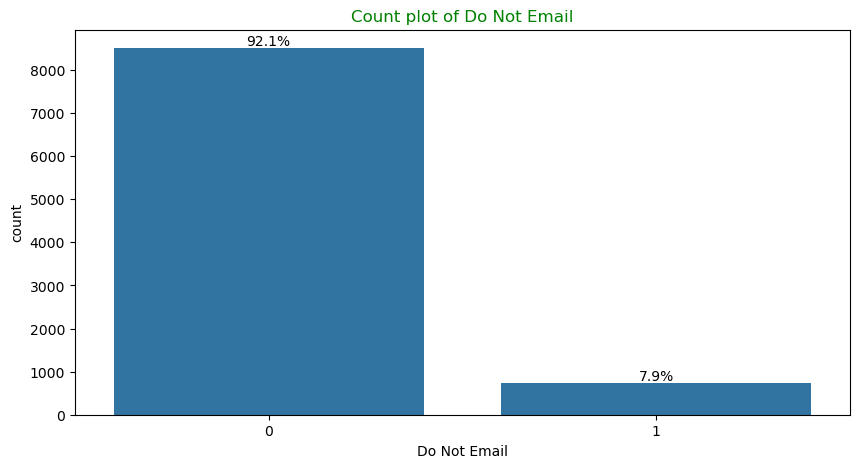

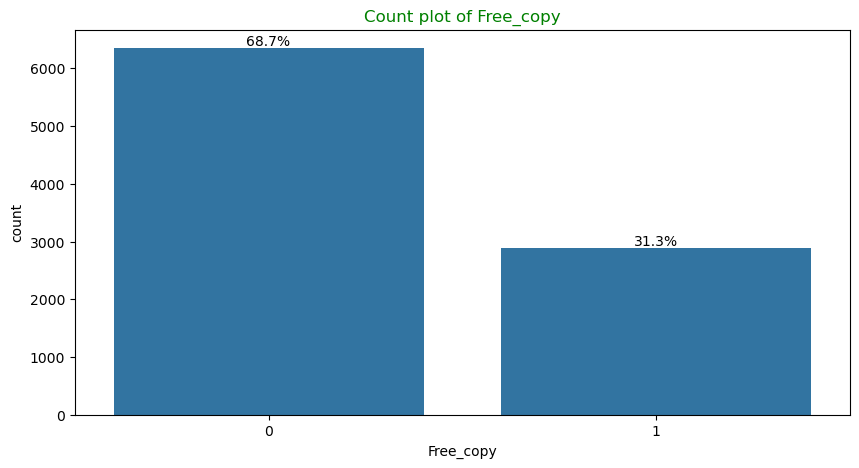

In [65]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads_df)
    total=len(leads_df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

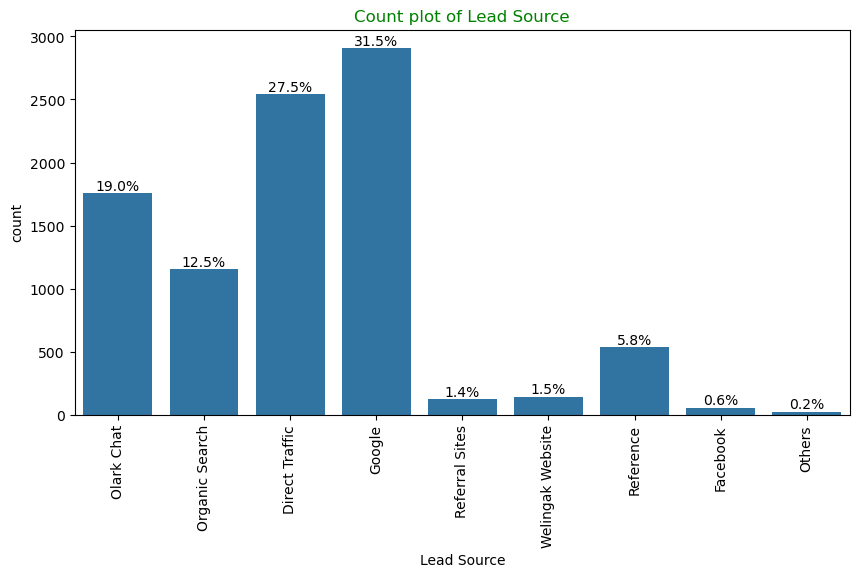

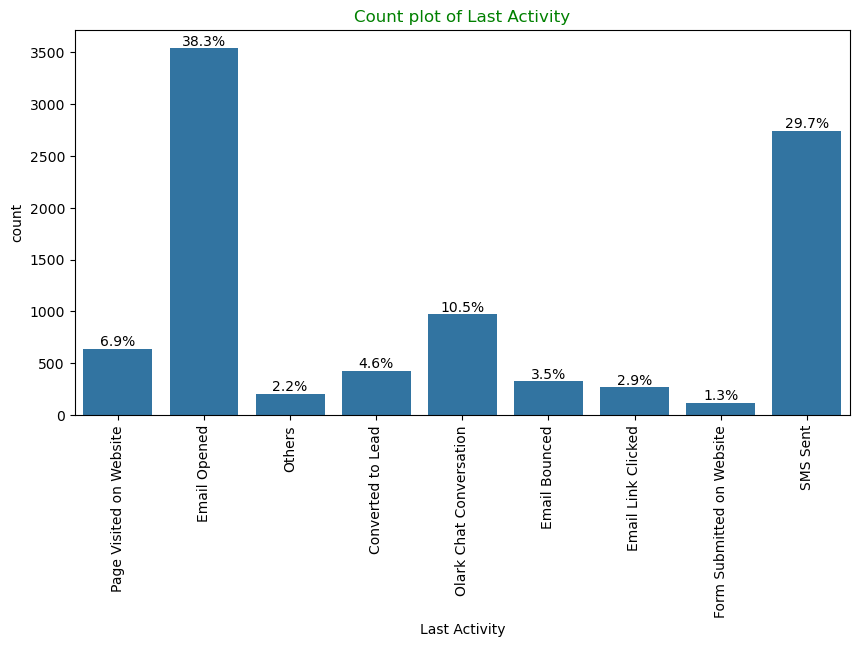

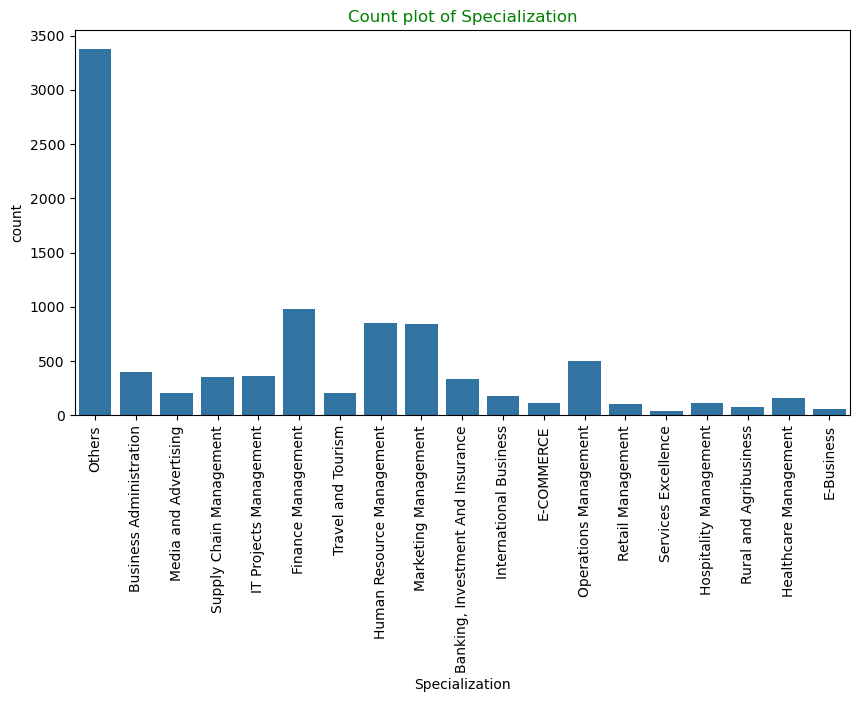

In [67]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)

for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads_df)
    total=len(leads_df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

> Insights:

In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

1. `Lead Origin`: "Landing Page Submission" identified 52.9% customers, "API" identified 38.7%.
2. `Current_occupation`: It has 89.7% of the customers as Unemployed
3. `Do Not Email`: 92.1% of the people has opted that they dont want to be emailed about the course.
4. `Lead Source`: 31.5% Lead source is from Google & 27.5% from Direct Traffic.
5. `Last Activity`: 29.7% of customers contribution in SMS Sent & 38.3% in Email Opened activities

#### 3.3 Bivariate Analysis

#### For Categorical Variables

In [68]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=leads_df,palette="prism_r",alpha=0.46)
    
    total=len(leads_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

IndexError: list index out of range

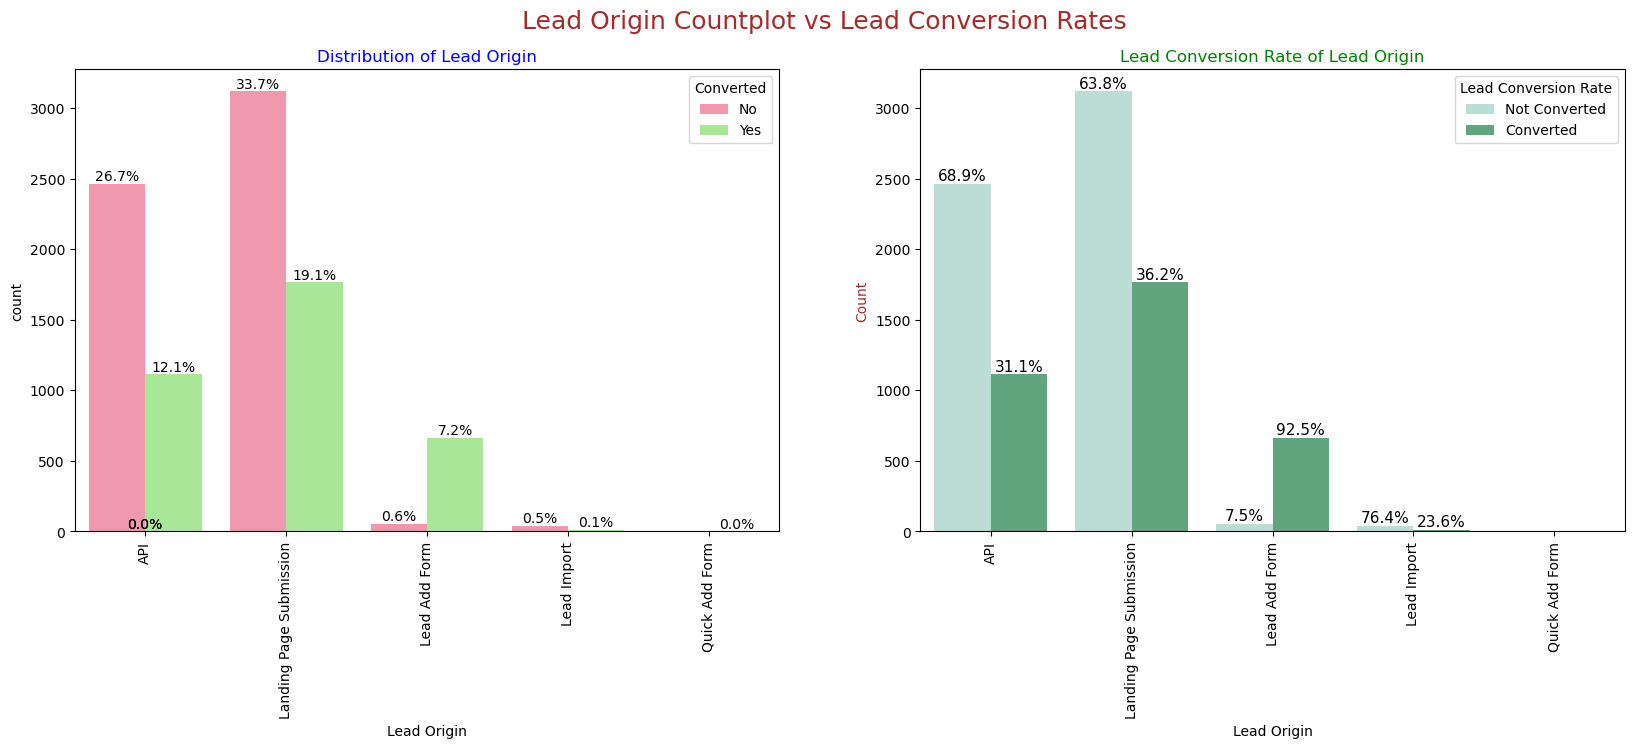

In [69]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'

cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(leads_df,variable_name=i)